# Task 1

In [8]:
import numpy as np


def eigenvalues_and_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    for i in range(len(eigenvalues)):
        eigenvalue = eigenvalues[i]
        eigenvector = eigenvectors[:, i]
        left_side = np.dot(matrix, eigenvector)
        right_side = eigenvalue * eigenvector

        if np.allclose(left_side, right_side):
            print(f"Eigenvalue {eigenvalue} satisfies equation")
        else:
            print(f"Eigenvalue {eigenvalue} and {eigenvector} do not satisfies equation")

    return eigenvalues, eigenvectors


A = np.array([
    [1, 1, 0],
    [9, 2, 0],
    [0, 1, 1]
])

eigenvalues, eigenvectors = eigenvalues_and_eigenvectors(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalue 1.0 satisfies equation
Eigenvalue 4.541381265149109 satisfies equation
Eigenvalue -1.5413812651491101 satisfies equation
Eigenvalues: [ 1.          4.54138127 -1.54138127]
Eigenvectors:
 [[ 0.          0.26223893  0.34383515]
 [ 0.          0.92868804 -0.87381621]
 [ 1.          0.26223893  0.34383515]]


# Task 2

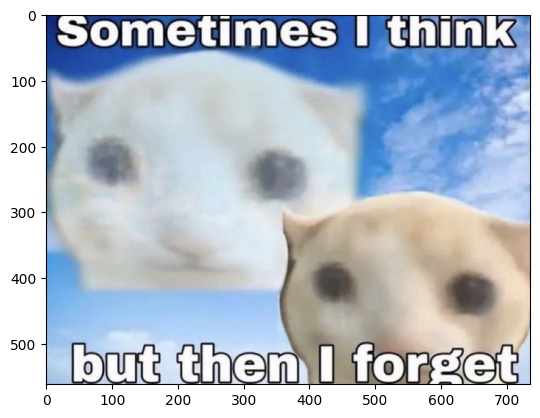

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

initial_image = np.asarray(Image.open("The-person-who-thinks-all-the-time....png"))
plt.imshow(initial_image)
plt.show()

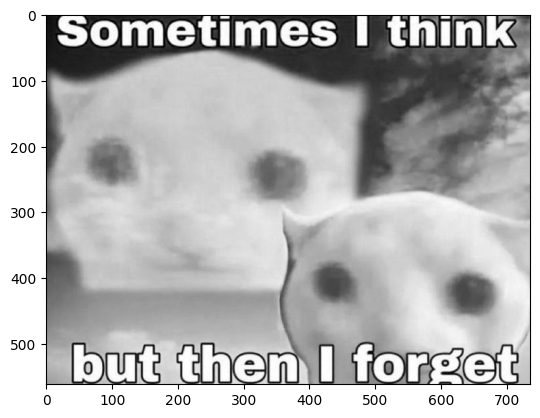

In [12]:
image_bw = initial_image[:, :, 0]
plt.imshow(image_bw, cmap='gray')
plt.show()

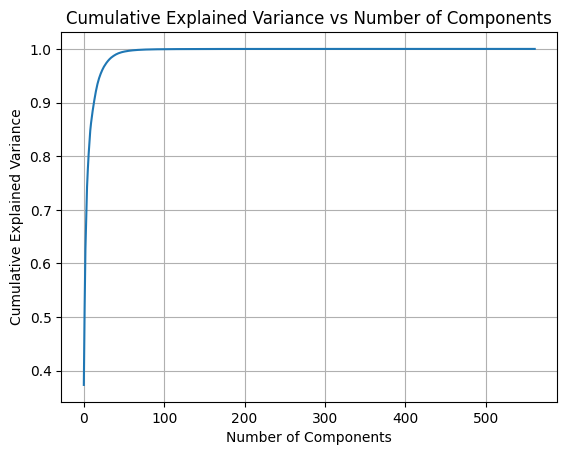

Number of components to cover 95% variance: 22


In [35]:
from sklearn.decomposition import PCA

pca = PCA()
image_pca = pca.fit_transform(image_bw)
image_reconstructed = pca.inverse_transform(image_pca)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to cover 95% variance: {n_components_95}')

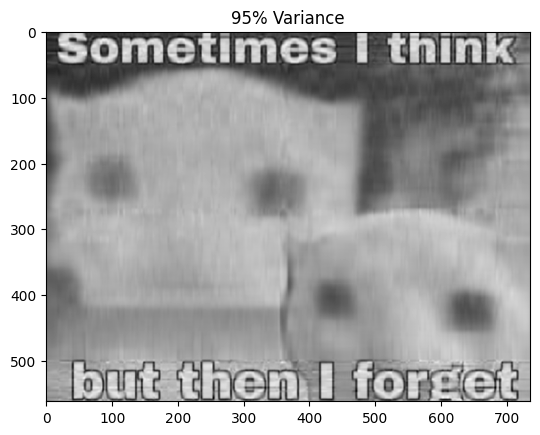

In [34]:
pca = PCA(n_components=n_components_95)
image_pca_95 = pca.fit_transform(image_bw)

image_reconstructed_95 = pca.inverse_transform(image_pca_95)

plt.imshow(image_reconstructed_95, cmap='gray')
plt.title('95% Variance')
plt.grid(False)
plt.show()


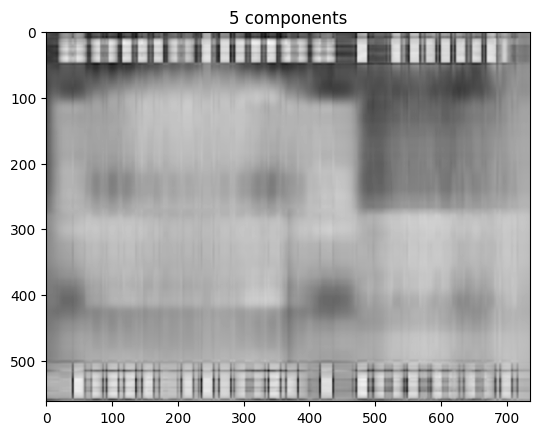

In [33]:
pca = PCA(n_components=5)
image_pca_5 = pca.fit_transform(image_bw)

image_reconstructed_5 = pca.inverse_transform(image_pca_5)

plt.imshow(image_reconstructed_5, cmap='gray')
plt.title('5 components')
plt.grid(False)
plt.show()

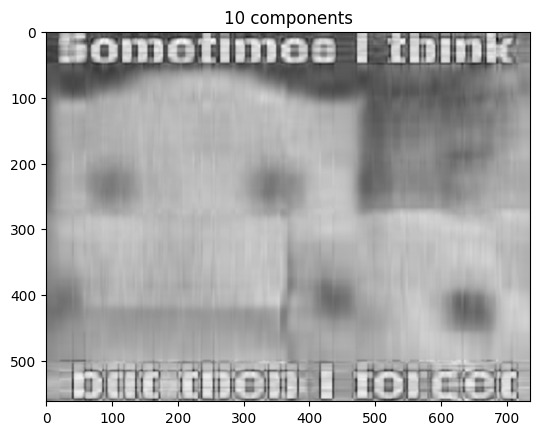

In [32]:
pca = PCA(n_components=10)
image_pca_10 = pca.fit_transform(image_bw)

image_reconstructed_10 = pca.inverse_transform(image_pca_10)

plt.imshow(image_reconstructed_10, cmap='gray')
plt.title('10 components')
plt.grid(False)
plt.show()

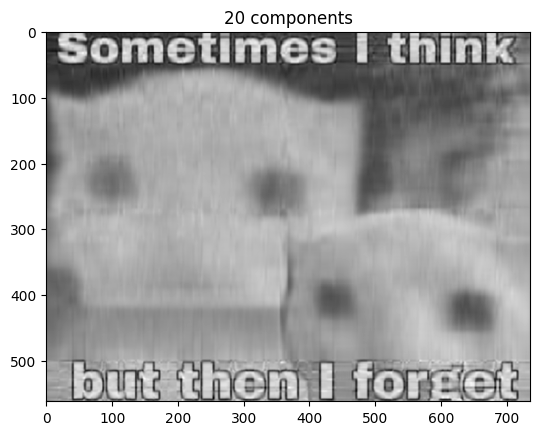

In [31]:
pca = PCA(n_components=20)
image_pca_20 = pca.fit_transform(image_bw)

image_reconstructed_20 = pca.inverse_transform(image_pca_20)

plt.imshow(image_reconstructed_20, cmap='gray')
plt.title('20 components')
plt.grid(False)
plt.show()


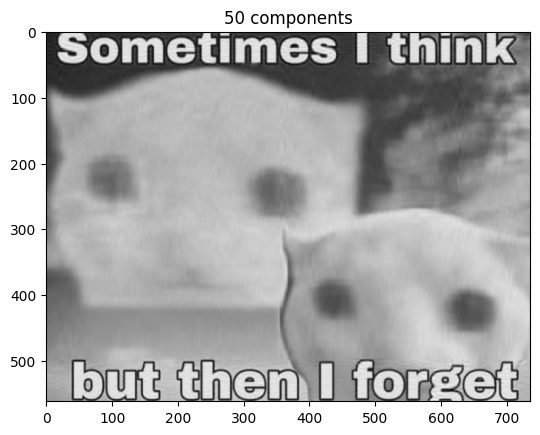

In [30]:
pca = PCA(n_components=50)
image_pca_50 = pca.fit_transform(image_bw)

image_reconstructed_50 = pca.inverse_transform(image_pca_50)

plt.imshow(image_reconstructed_50, cmap='gray')
plt.title('50 components')
plt.grid(False)
plt.show()


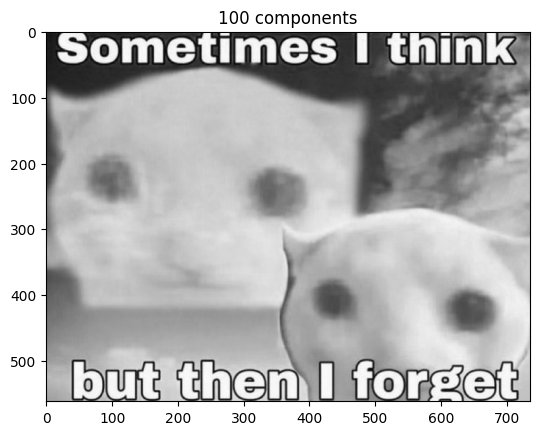

In [28]:
pca = PCA(n_components=100)
image_pca_100 = pca.fit_transform(image_bw)

image_reconstructed_100 = pca.inverse_transform(image_pca_100)

plt.imshow(image_reconstructed_100, cmap='gray')
plt.title('100 components')
plt.grid(False)
plt.show()


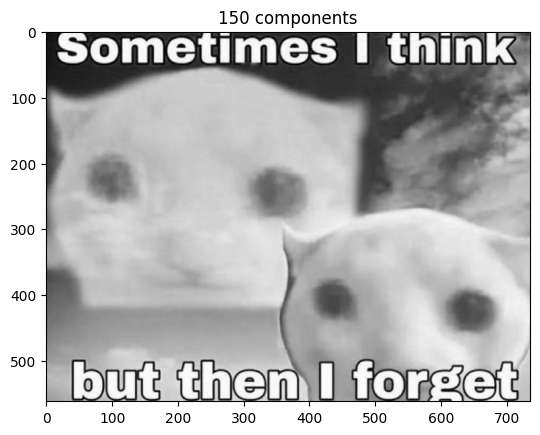

In [29]:
pca = PCA(n_components=150)
image_pca_150 = pca.fit_transform(image_bw)

image_reconstructed_150 = pca.inverse_transform(image_pca_150)

plt.imshow(image_reconstructed_150, cmap='gray')
plt.title('150 components')
plt.grid(False)
plt.show()


In [25]:
def encrypt_massage(massage, key_matrix):
    massage_vector = np.array([ord(char) for char in massage])
    eigenvalues_f, eigenvectors_f = np.linalg.eig(key_matrix)
    D_key_matrix = np.dot(np.dot(eigenvectors_f, np.diag(eigenvalues_f)), np.linalg.inv(eigenvectors_f))
    encrypted_vector = np.dot(D_key_matrix, massage_vector)
    return encrypted_vector


def decrypt_massage(encrypted_vector, key_matrix):
    decrypted_massage = ""
    reverse_matrix = np.linalg.inv(key_matrix)
    decrypted_vector = np.dot(reverse_matrix, encrypted_vector)
    for num in decrypted_vector.real:
        decrypted_massage += chr(int(np.round(num)))

    return decrypted_massage


massage = "Hello, word!"
print(f"Original massage: {massage}")

key_matrix = np.random.randint(0, 250, (len(massage), len(massage)))
encrypted_massage = encrypt_massage(massage, key_matrix)
print(f"Encrypted massage:\n{encrypted_massage}")

decrypted_massage = decrypt_massage(encrypted_massage, key_matrix)
print(f"Decrypted massage: {decrypted_massage}")

Original massage: Hello, word!
Encrypted massage:
[127360.+1.79671834e-11j 148197.+1.26127894e-11j 145727.+1.99077388e-11j
 155305.+1.98319309e-11j 145444.+2.54504160e-11j 113389.+1.17586653e-11j
 135329.+1.83629118e-11j 104947.+8.29015143e-12j  71344.+5.90971802e-12j
 137768.+1.18251836e-11j 124664.+8.67174099e-12j  88823.+1.23861040e-11j]
Decrypted massage: Hello, word!
